In [1]:
import keras
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns
from keras import layers
from keras import Sequential
from keras import activations

%matplotlib inline
import os
import pandas as pd
from glob import glob
import numpy as np

C:\Users\PC\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


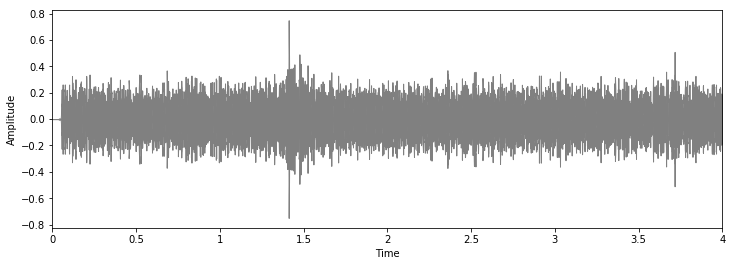

In [2]:
dataset = '/Users/PC/Deep learning/UrbanSound Dataset sample/audio/100852-0-0-0.wav'
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
data,sample_rate = librosa.load(dataset)
_ = librosa.display.waveplot(data,sr=sample_rate, color="grey")
ipd.Audio(dataset)

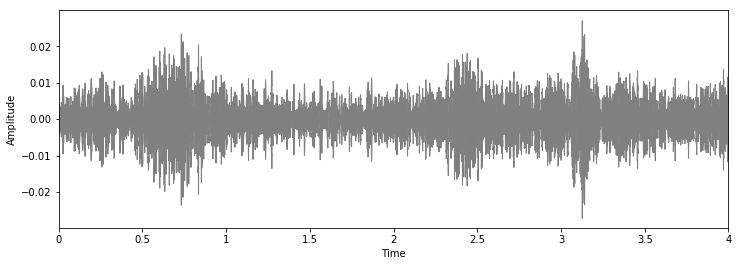

In [3]:
# Class: Children playing 
dataset = '/Users/PC/Deep learning/UrbanSound Dataset sample/audio/100263-2-0-117.wav'
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
data,sample_rate = librosa.load(dataset)
_ = librosa.display.waveplot(data,sr=sample_rate, color="grey")
ipd.Audio(dataset)

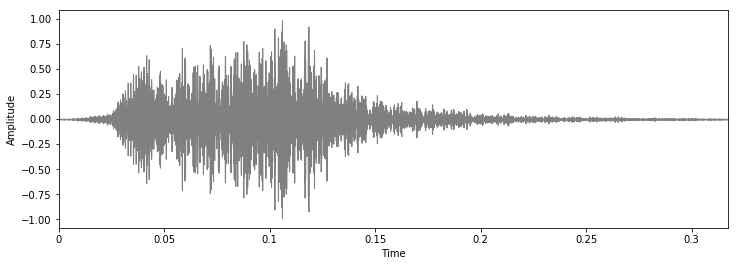

In [4]:
# Class: Dog bark
dataset = '/Users/PC/Deep learning/UrbanSound Dataset sample/audio/100032-3-0-0.wav'
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
data,sample_rate = librosa.load(dataset)
_ = librosa.display.waveplot(data,sr=sample_rate, color="grey")
ipd.Audio(dataset)

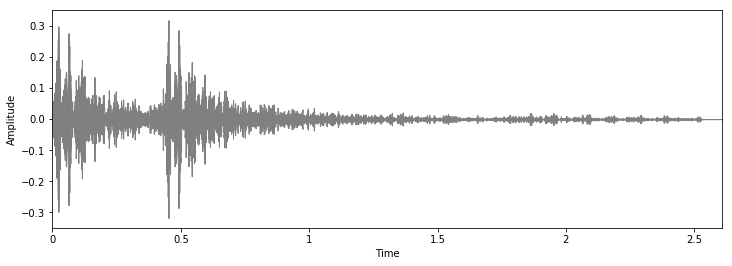

In [5]:
# Class: Gunshot
dataset = '/Users/PC/Deep learning/UrbanSound Dataset sample/audio/102305-6-0-0.wav'
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
data,sample_rate = librosa.load(dataset)
_ = librosa.display.waveplot(data,sr=sample_rate, color="grey")
ipd.Audio(dataset)

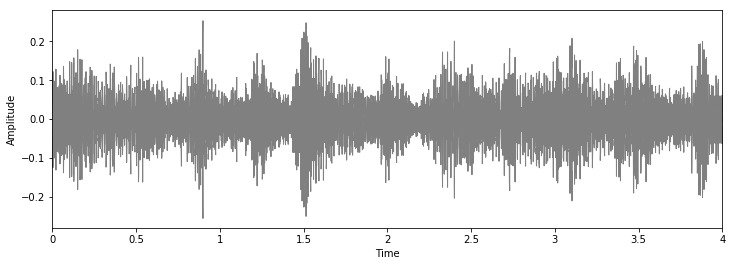

In [6]:
# Class: Street music
dataset = '/Users/PC/Deep learning/UrbanSound Dataset sample/audio/101848-9-0-0.wav'
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
data,sample_rate = librosa.load(dataset)
_ = librosa.display.waveplot(data,sr=sample_rate, color="grey")
ipd.Audio(dataset)

In [7]:
meta_data = pd.read_csv("/Users/PC/Deep learning/UrbanSound Dataset sample/metadata/UrbanSound8K.csv")  
np.shape(meta_data) 
meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:

print((meta_data.classID.value_counts().sort_index()))

0    1000
1     429
2    1000
3    1000
4    1000
5    1000
6     374
7    1000
8     929
9    1000
Name: classID, dtype: int64


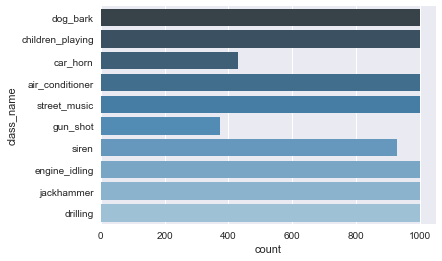

In [9]:
sns.set(style="darkgrid")
sns.countplot(y= meta_data['class_name'],orient='v', palette=("Blues_d"))
plt.show()

In [10]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = '/Users/PC/Deep learning/UrbanSound Dataset sample/audio/100852-0-0-0.wav' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

Original sample rate: 44100
Librosa sample rate: 22050


In [11]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -23628 to 27507
Librosa audio file min~max range: -0.50266445 to 0.74983937


In [12]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


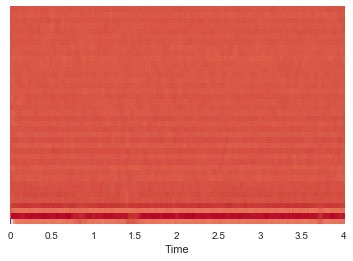

In [13]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [14]:
y,sr=librosa.load("/Users/PC/Deep learning/Notebooks/urbansound8k/fold5/100032-3-0-0.wav")
mfccs = lsnippibrosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40, 14), (40, 14), (40, 14), (40, 14), (40, 14))

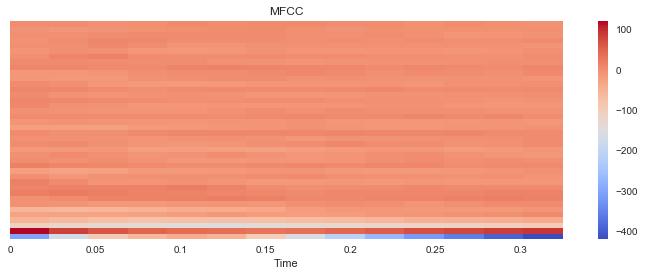

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

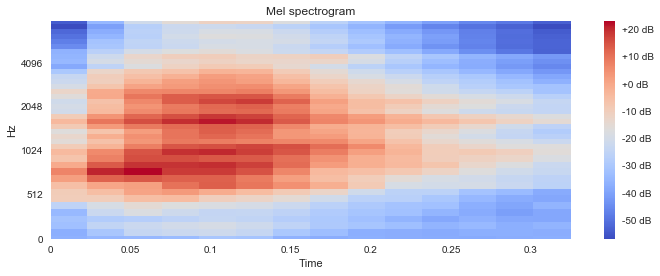

In [16]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

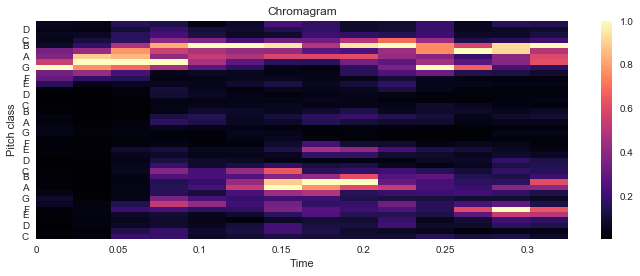

In [17]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

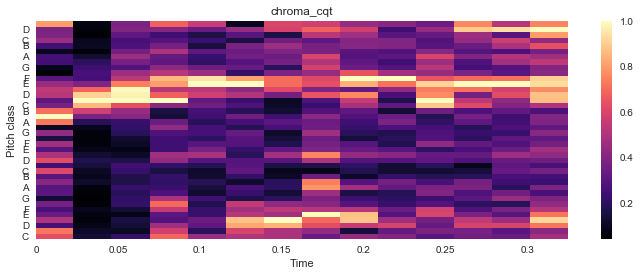

In [18]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

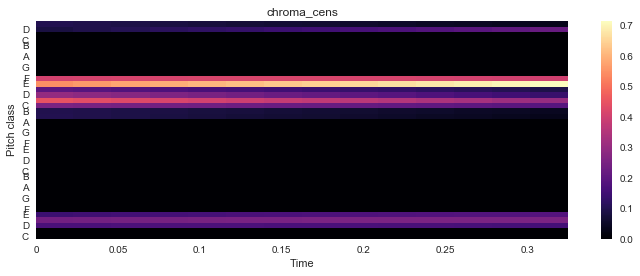

In [19]:
#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [40]:
def create_spectrogram(filename,name):
    name = name.split('.')[0]
    print(name)
    plt.interactive(False)
    fig = plt.figure(figsize=(10,10))
#    plt.figure(figsize=(100,100))
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    clip,sample_rate = librosa.load(filename,duration=5.0)
    s = librosa.feature.melspectrogram(y=clip,sr = sample_rate)
    librosa.display.specshow(s, sr=sample_rate, x_axis='time', y_axis='mel')

100852-0-0-0


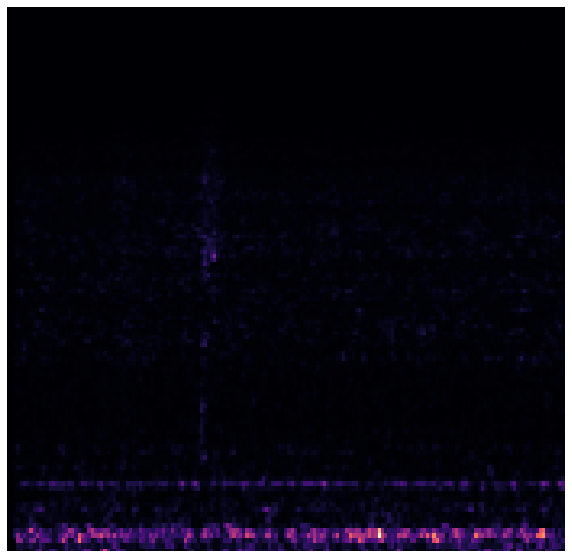

In [41]:
filename = '/Users/PC/Deep learning/UrbanSound Dataset sample/audio/100852-0-0-0.wav'
name = filename.split('/')[-1]
name = name.split('.')[0]
name
create_spectrogram('/Users/PC/Deep learning/UrbanSound Dataset sample/audio/100852-0-0-0.wav',name)